### Import libary

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [0]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.3.


### Load data and process by vectorizer

In [0]:
def load_data(first_file_name, second_file_name):
    def process_data(file_name):
        # load txt file
        lines = []
        with open(file_name, 'r') as myfile:
            for line in myfile.readlines():
                lines.append(' '.join(line.split()))
        return lines
    
    fake_num_rows = len(process_data(first_file_name))
    entire_list = process_data(first_file_name) + process_data(second_file_name)
    
    # pre-processing the data: count the frequency
    vectorizer = CountVectorizer(stop_words = 'english')
    X = vectorizer.fit_transform(entire_list)
    df = pd.DataFrame(data = X.toarray(),
                      columns = vectorizer.get_feature_names())
    
    # add the label column
    df['Y'] = 'real'
    df.loc[0:fake_num_rows,'Y'] = 'fake'
    
    # separate feaures x and target y
    y = df['Y']
    x = df.drop(['Y'], axis=1)
    
    # split the entire data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.17, random_state=1, shuffle=True)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [0]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_data('clean_fake.txt', 'clean_real.txt')

In [0]:
X_train.head(5)

,00,000,10,100,100mln,10m,11,11yo,12,125,...,zoe,zoellick,zombies,zone,zones,zu,zuckerberg,zuesse,zulema,zur
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
Y_train.head(5)

20      fake
928     fake
1314    real
974     fake
3197    real
Name: Y, dtype: object

### Model training using several groups of hyperparameters

In [0]:
# references
# https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
def select_model(xtrain, ytrain, xval, yval):
    max_depths = [5, 10, 20, 40, 50]
    criteria = ['gini', 'entropy']
    for depth in max_depths:
        for cri in criteria:
            clf = DecisionTreeClassifier(criterion=cri, max_depth=depth, random_state=1)
            clf.fit(xtrain, ytrain)
            prediction = clf.predict(xval)
            acc = accuracy_score(yval, prediction)
            print('The model with depth', depth, 'and criterion', cri, 'has the validation accuracy of', acc)

In [0]:
select_model(X_train, Y_train, X_val, Y_val)

The model with depth 5 and criterion gini has the validation accuracy of 0.6588983050847458
The model with depth 5 and criterion entropy has the validation accuracy of 0.6567796610169492
The model with depth 10 and criterion gini has the validation accuracy of 0.690677966101695
The model with depth 10 and criterion entropy has the validation accuracy of 0.684322033898305
The model with depth 20 and criterion gini has the validation accuracy of 0.7182203389830508
The model with depth 20 and criterion entropy has the validation accuracy of 0.7351694915254238
The model with depth 40 and criterion gini has the validation accuracy of 0.7796610169491526
The model with depth 40 and criterion entropy has the validation accuracy of 0.7796610169491526
The model with depth 50 and criterion gini has the validation accuracy of 0.7902542372881356
The model with depth 50 and criterion entropy has the validation accuracy of 0.7817796610169492


It can be seen from the hyperparameters chosen, model with max depth of 50 and gini as the criterion can have the highest accuracy on validation dataset, which is 79%.

## Select best tree model and plot

In [0]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

In [0]:
clf_final = DecisionTreeClassifier(criterion='gini', max_depth=50, random_state=1)
clf_final.fit(X_train, Y_train)
predictions = clf_final.predict(X_test)
test_acc = accuracy_score(Y_test, predictions)
print('The model with depth 50 and criterion gini has the testing accuracy of', test_acc)

The model with depth 50 and criterion gini has the testing accuracy of 0.746938775510204


This accuracy is somehow nice because it can get 75% accuracy on the test dataset.

[Text(1931.5384615384617, 1902.6000000000001, 'donald <= 0.5\ngini = 0.479\nsamples = 2304\nvalue = [914, 1390]\nclass = real'),
 Text(1030.1538461538462, 1359.0, 'hillary <= 0.5\ngini = 0.5\nsamples = 1552\nvalue = [754, 798]\nclass = real'),
 Text(515.0769230769231, 815.4000000000001, 'trumps <= 0.5\ngini = 0.496\nsamples = 1455\nvalue = [659, 796]\nclass = real'),
 Text(257.53846153846155, 271.79999999999995, '\n  (...)  \n'),
 Text(772.6153846153846, 271.79999999999995, '\n  (...)  \n'),
 Text(1545.2307692307693, 815.4000000000001, 'saying <= 0.5\ngini = 0.04\nsamples = 97\nvalue = [95, 2]\nclass = fake'),
 Text(1287.6923076923076, 271.79999999999995, '\n  (...)  \n'),
 Text(1802.769230769231, 271.79999999999995, '\n  (...)  \n'),
 Text(2832.923076923077, 1359.0, 'voting <= 0.5\ngini = 0.335\nsamples = 752\nvalue = [160, 592]\nclass = real'),
 Text(2575.3846153846152, 815.4000000000001, 'black <= 0.5\ngini = 0.325\nsamples = 744\nvalue = [152, 592]\nclass = real'),
 Text(2317.84615

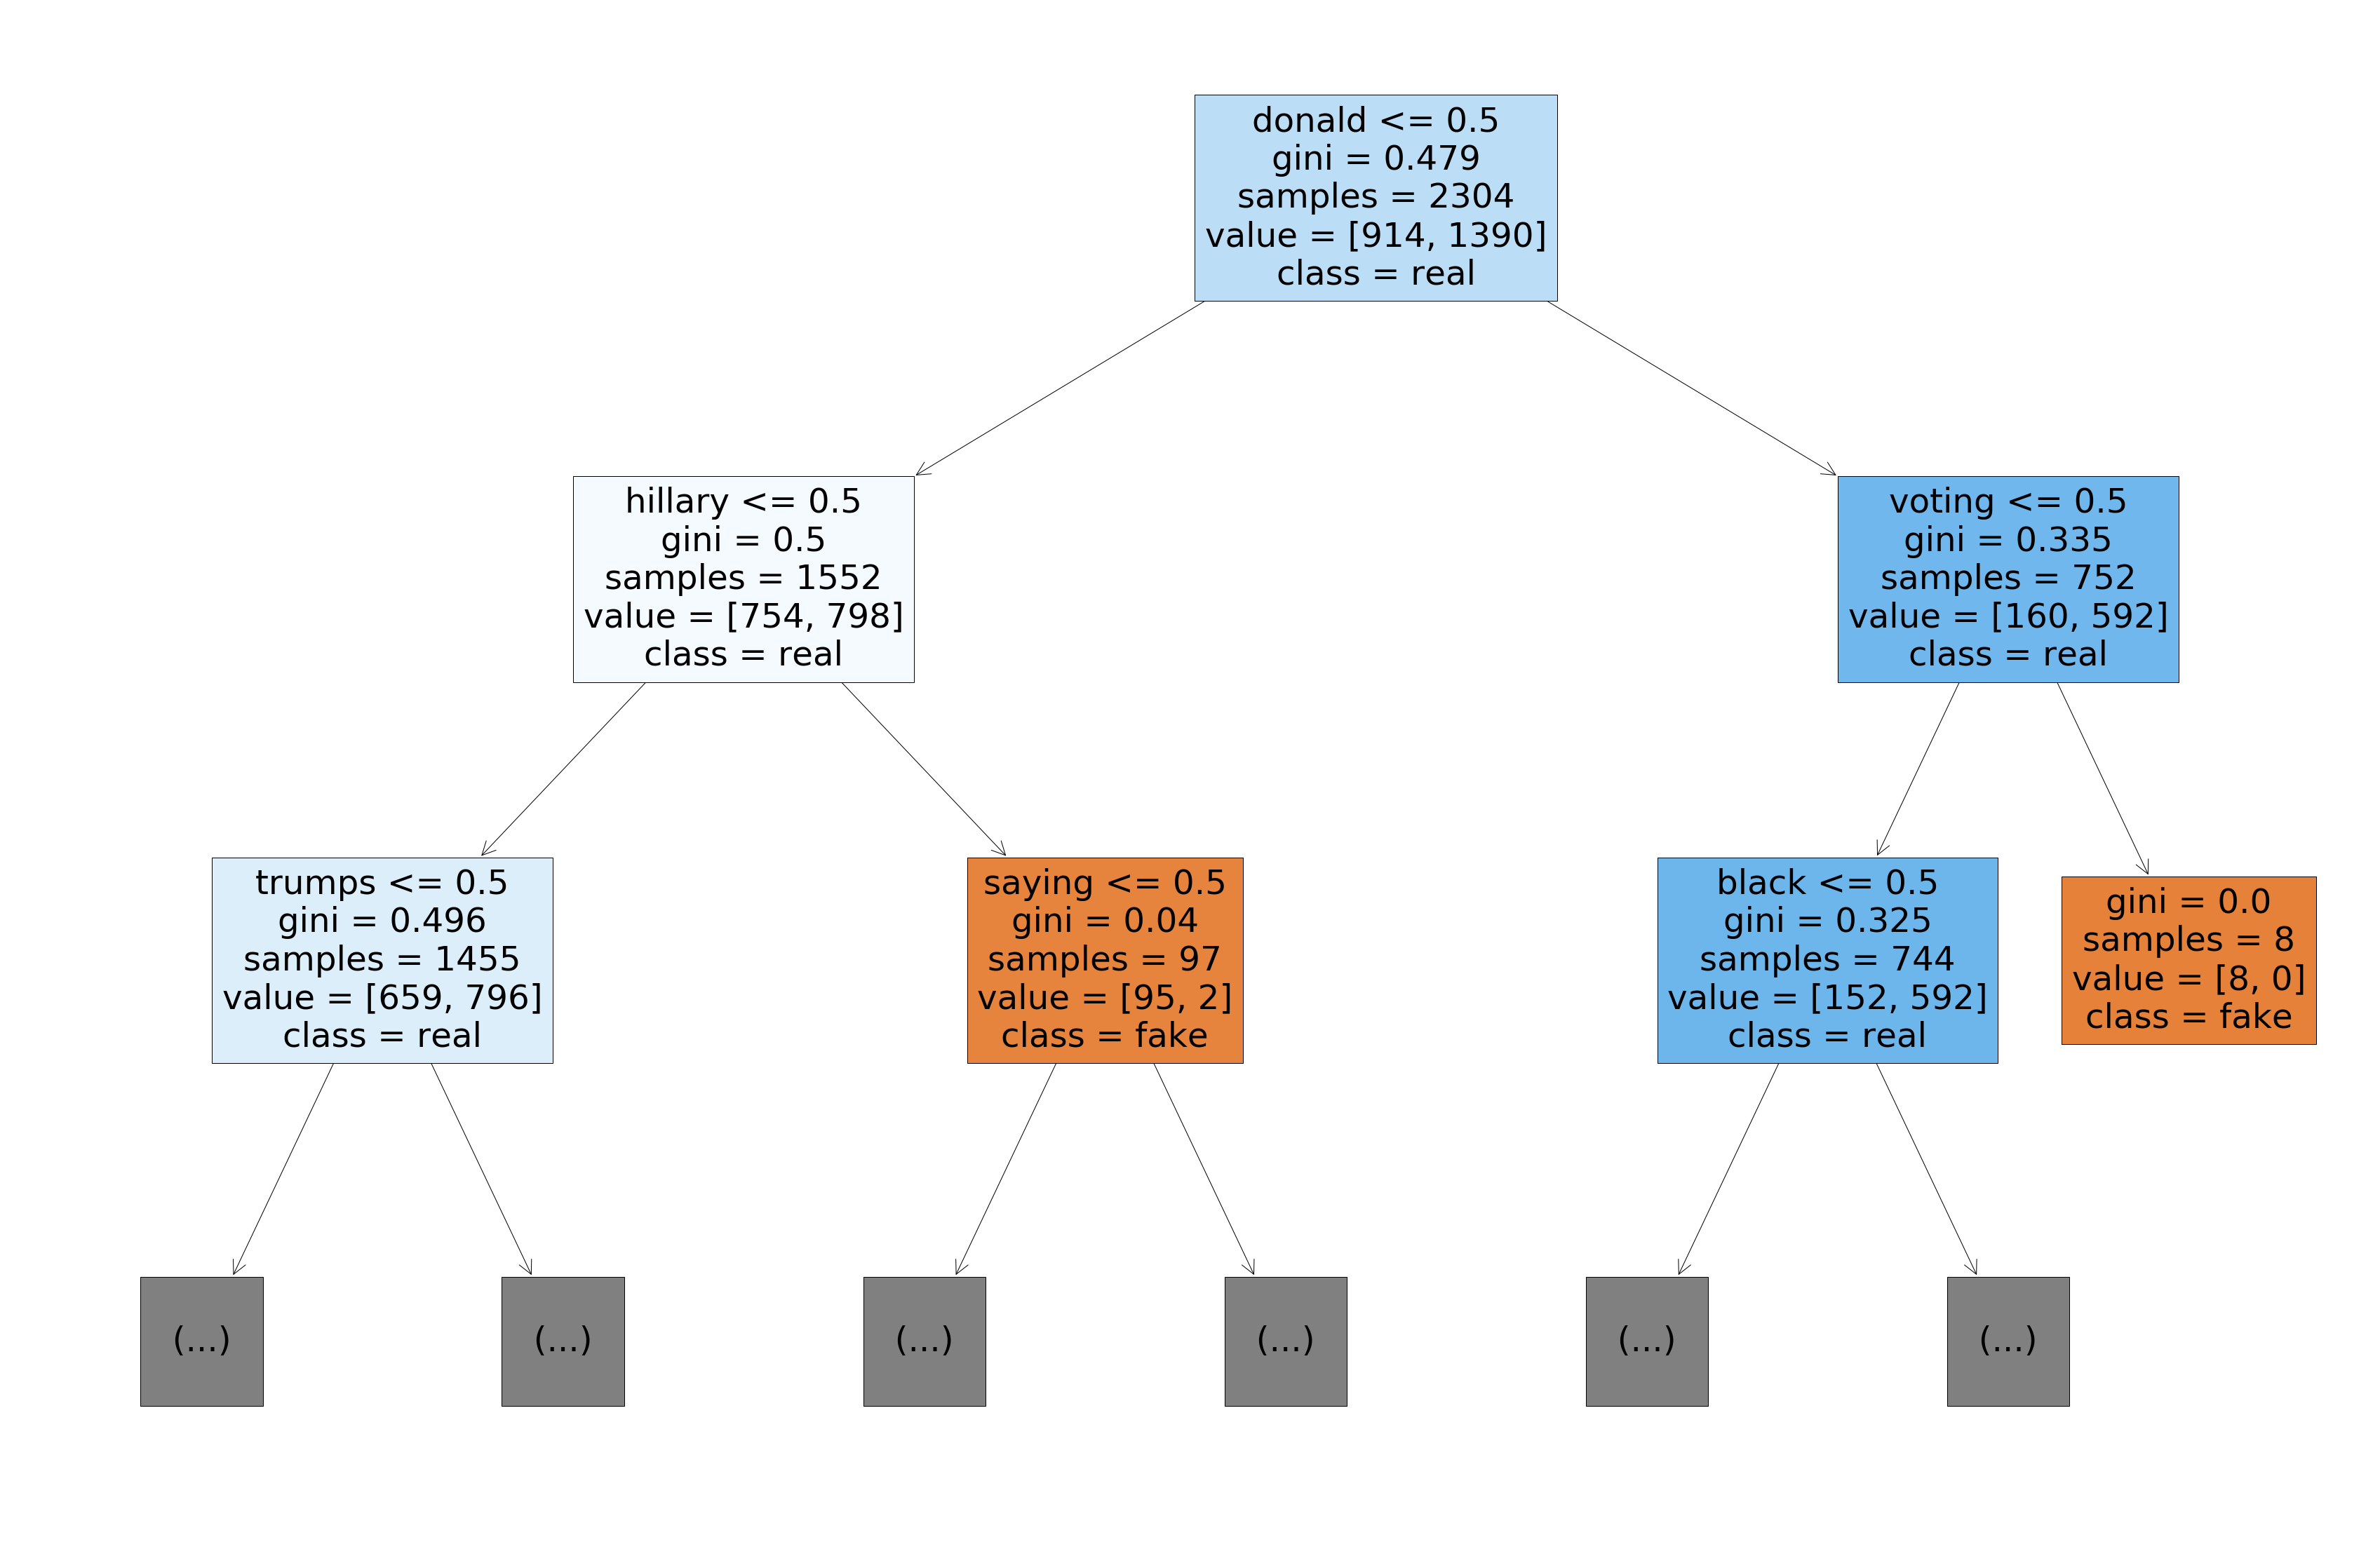

In [0]:
# use plot_tree
# set up the parameters
rcParams['figure.figsize'] = 60, 40
plot_tree(clf_final, max_depth=2, feature_names = X_train.columns, class_names = ['fake', 'real'], label = 'all', filled=True)

In [0]:
# use graphviz
from IPython.display import Image
import pydotplus

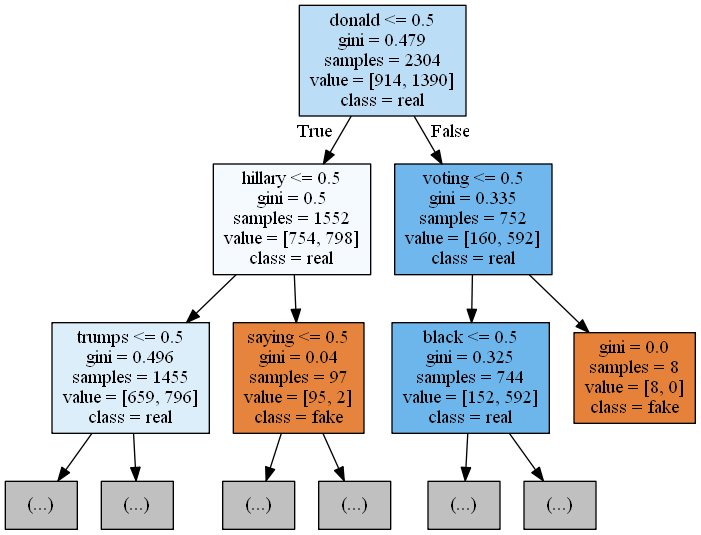

In [0]:
# Create DOT data
dot_data = tree.export_graphviz(clf_final, out_file=None, 
                                max_depth=2, feature_names = X_train.columns, 
                                class_names = ['fake', 'real'], label = 'all', filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())